Index(['country', 'date', 'manufacturing pmi', 'services pmi',
       'consumer confidence', 'interest rates', 'cpi yoy', 'core cpi',
       'unemployment rate', 'gdp yoy', 'ticker', 'open', 'high', 'low',
       'close'],
      dtype='object')


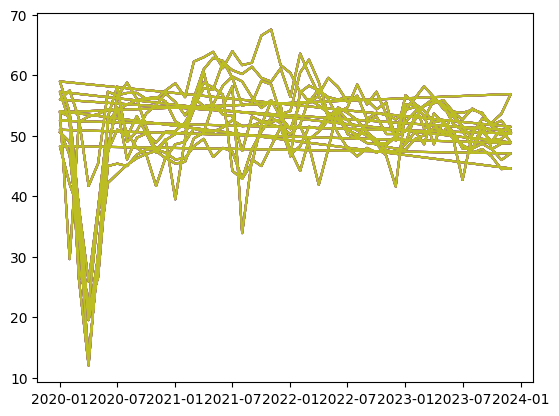

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text

df = pd.read_csv('economic_data.csv')
df['date'] = pd.to_datetime(df['date'])
print(df.columns)

col_to_update = ['unemployment rate', 'cpi yoy', 'core cpi', 'gdp yoy', 'interest rates']
for col in col_to_update:
   df[col] = df[col].str.replace('%', '').astype(float)
df.tail()

for group in df['country'].unique():
   subset = df[df['country']!=group]
   plt.plot(df['date'], df[value])
plt.show()

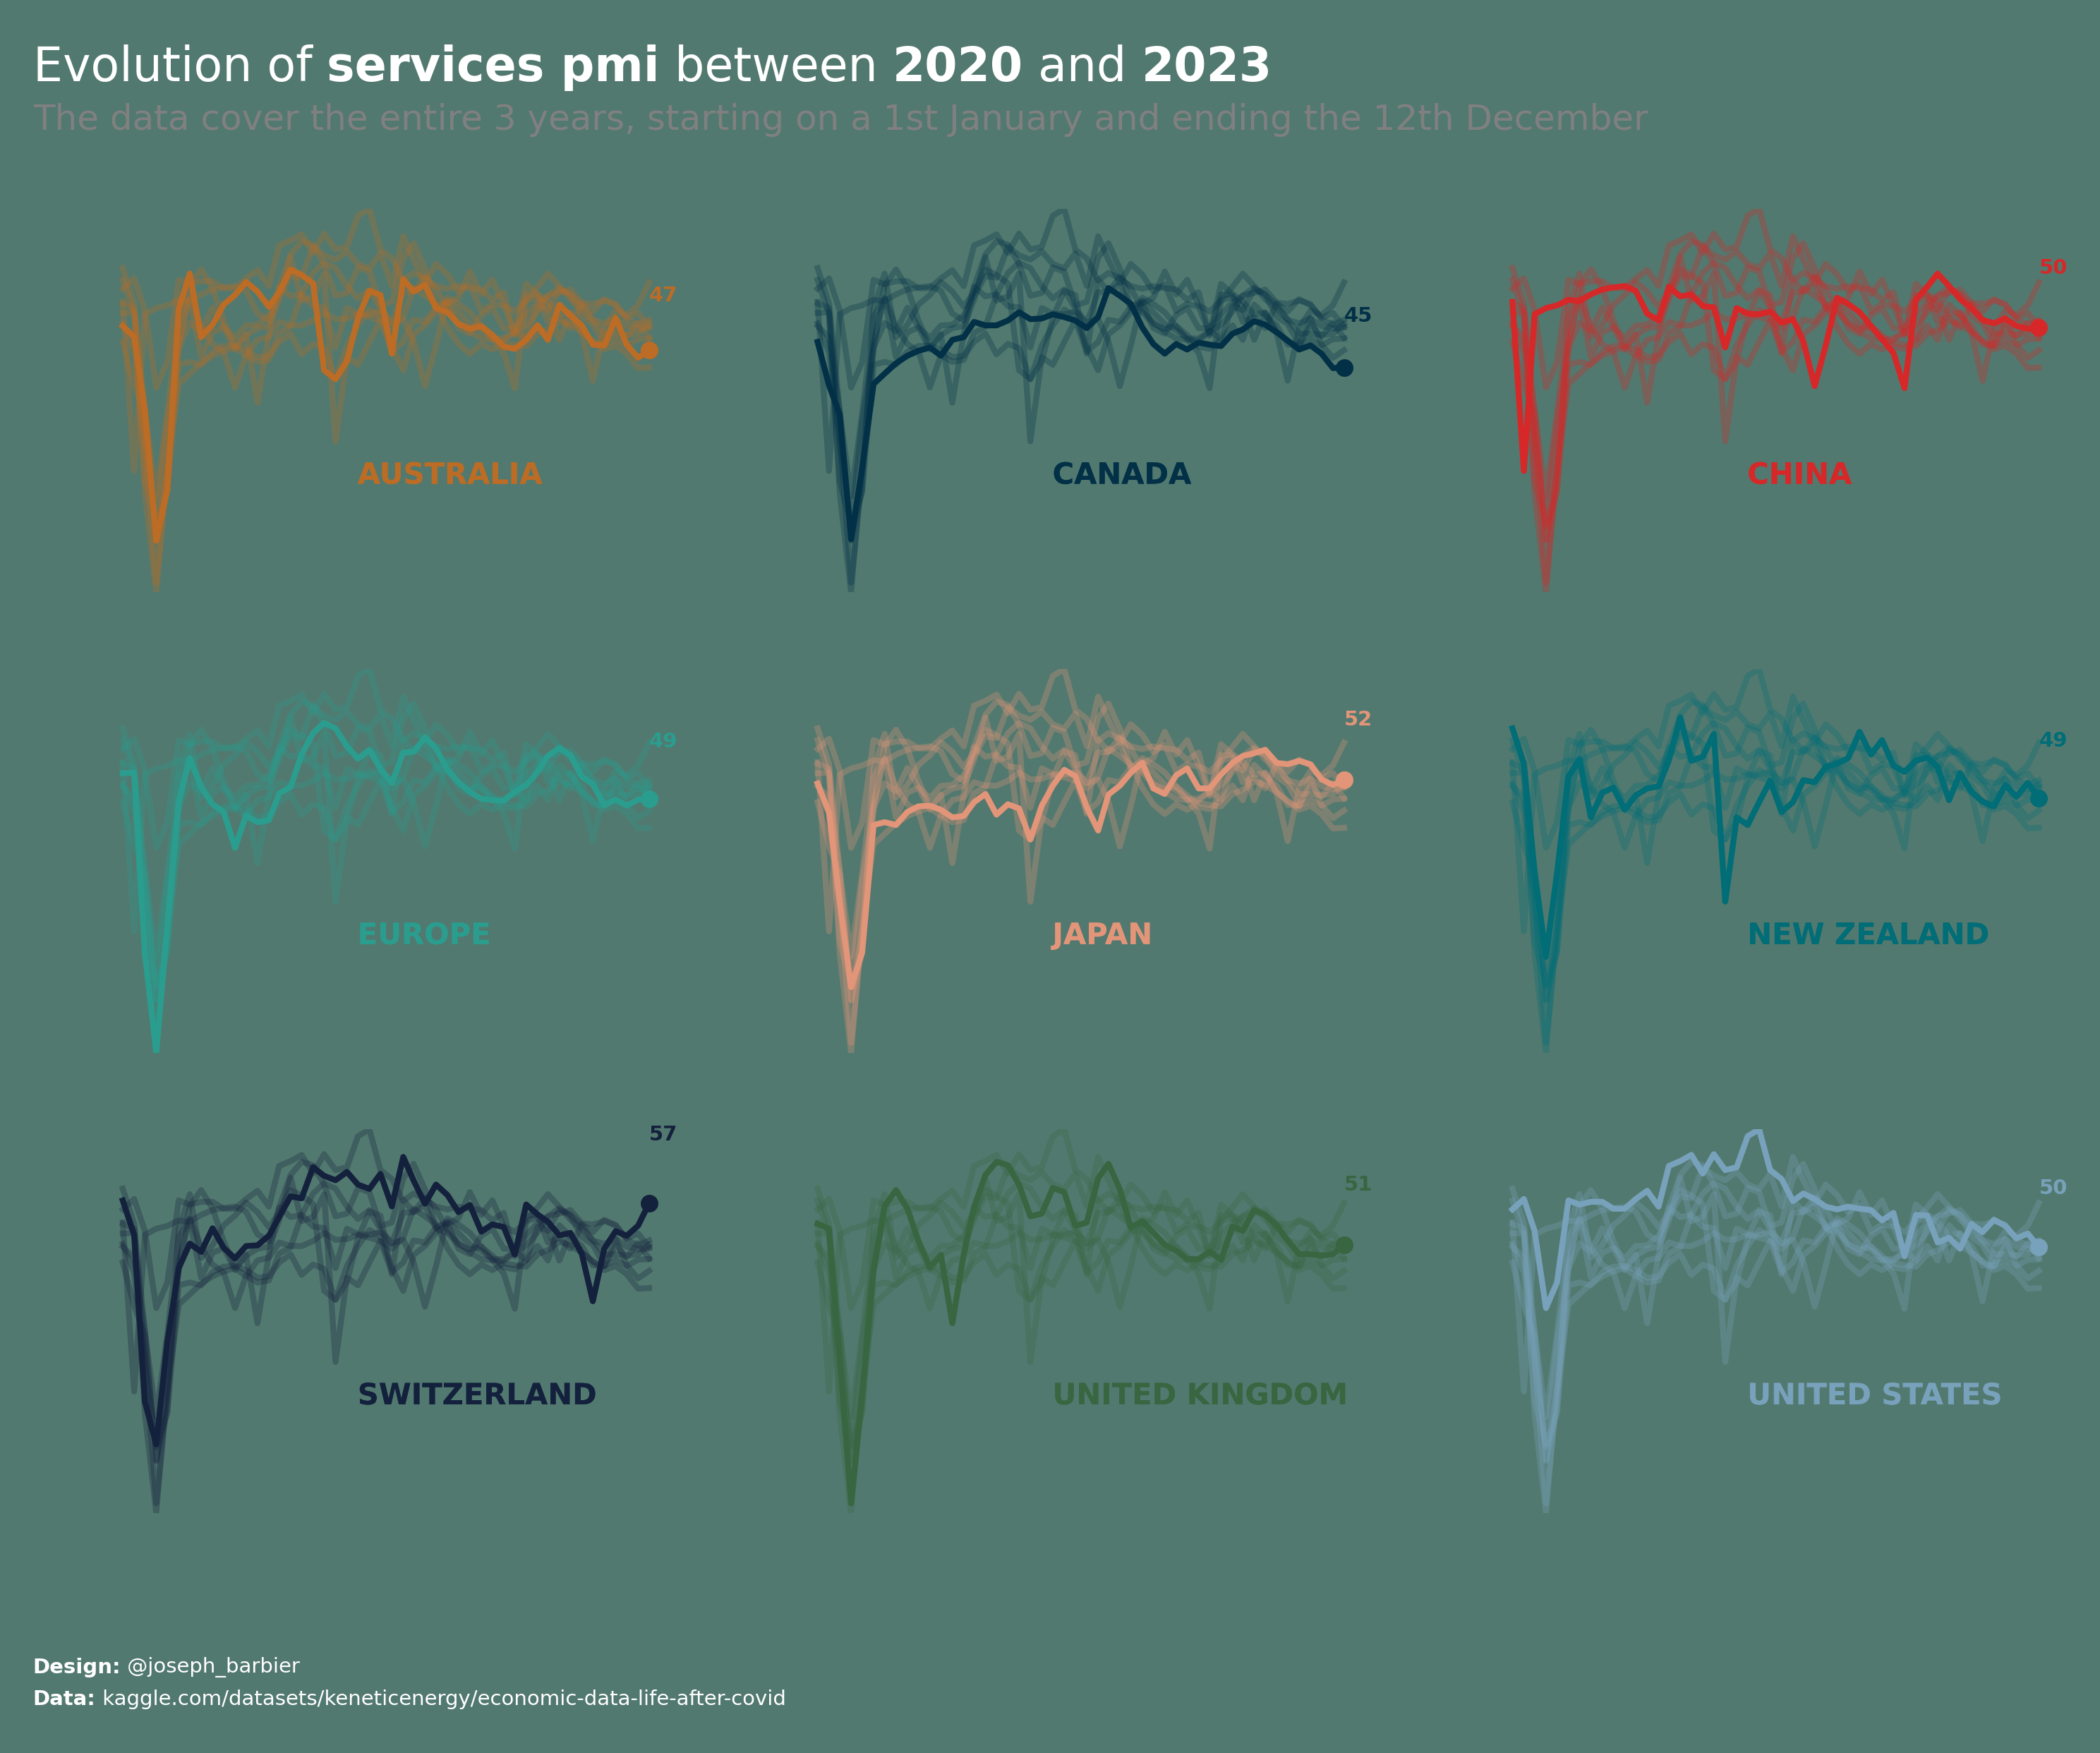

In [122]:
# parameters
dpi = 300
category = 'country'
year = 'date'
value = 'services pmi'
background_color = '#52796f'
text_color = 'white'
linewidth_main = 2
colors = [
    '#bc6c25',
    '#023047',
    '#d62828',
    '#2a9d8f',
    '#e29578',
    '#006d77',
    '#14213d',
    '#386641',
    '#78a1bb'
]
y_adj = -20
def get_path_effect(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
path_effect = get_path_effect(linewidth=0, foreground=text_color, alpha=1)

fig, axs = plt.subplots(3, 3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

for i, (group, ax) in enumerate(zip(df[category].unique(), axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # Filter for the group
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot last data point
   filtered_df = filtered_df.sort_values(by=year)
   last_value = filtered_df.iloc[-1][value]
   last_date = filtered_df.iloc[-1][year]
   ax.plot(
      last_date, last_value,
      marker='o', markersize=5, color=colors[i],
   )
   ax_text(
      last_date, last_value*1.2,
      f'{round(last_value)}',
      fontsize=7, color=colors[i], fontweight='bold',
      ax=ax
   )

   # Plot other groups with lighter colors 
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color=colors[i], alpha=0.3, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main)
   
   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min(), df[value].max())

   # Display country names
   ax_text(
      18900, df[value].mean()+y_adj,
      f'<{group.upper()}>',
      va='top', ha='left',
      fontsize=10, fontweight='bold',
      color=colors[i], ax=ax,
      highlight_textprops=[{
         "path_effects": path_effect
      }]
   )

# credit
credit = """
<Design:> @joseph_barbier
<Data:> kaggle.com/datasets/keneticenergy/economic-data-life-after-covid
"""
fig_text(
   0.1, 0.01,
   credit,
   fontsize=7,
   ha='left', va='center',
   color=text_color,
   highlight_textprops=[
      {'fontweight': 'bold'},
      {'fontweight': 'bold'}
   ],
   fig=fig
)

# title
start_x_position = df.iloc[0][year]
end_x_position = df.iloc[-1][year]
title = f"""
Evolution of <{value}> between <{str(start_x_position)[:4]}> and <{str(end_x_position)[:4]}>
<The data cover the entire 3 years, starting on a 1st January and ending the 12th December>
"""
fig_text(
   0.1, 0.95,
   title,
   fontsize=16,
   ha='left', va='center',
   color=text_color,
   highlight_textprops=[
      {'fontweight': 'bold'},
      {'fontweight': 'bold'},
      {'fontweight': 'bold'},
      {'color': 'grey', 'fontsize': 12}
   ],
   fig=fig
)

fig.savefig(f'{value}_linecharts.png', bbox_inches='tight', dpi=dpi)
plt.show()